<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.316463,49.791838,20.882733,0.000294,125.991327,125.990972,0.000355
1,0.0,1.0,93.685879,43.698379,52.356192,0.000020,199.740471,199.740385,0.000086
2,0.0,2.0,99.911367,63.212188,72.335363,-0.000509,245.458410,245.458878,-0.000469
3,0.0,3.0,41.201608,84.067383,90.484382,0.000278,225.753652,225.753439,0.000213
4,0.0,4.0,69.684253,39.491849,41.398168,0.000833,160.575102,160.574215,0.000887
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.220741,69.255728,23.965929,-0.000186,178.442213,178.442538,-0.000325
119996,999.0,116.0,65.906399,78.353535,59.050029,-0.000030,213.309933,213.309970,-0.000036
119997,999.0,117.0,25.975283,50.445100,23.830659,-0.000158,110.250883,110.251217,-0.000334
119998,999.0,118.0,64.029714,68.851910,41.981131,0.000099,184.862854,184.862835,0.000019


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.316463,49.791838,20.882733,0.000294,125.991327,125.990972,0.000355
1,0.0,1.0,93.685879,43.698379,52.356192,0.000020,199.740471,199.740385,0.000086
2,0.0,2.0,99.911367,63.212188,72.335363,-0.000509,245.458410,245.458878,-0.000469
3,0.0,3.0,41.201608,84.067383,90.484382,0.000278,225.753652,225.753439,0.000213
4,0.0,4.0,69.684253,39.491849,41.398168,0.000833,160.575102,160.574215,0.000887
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.220741,69.255728,23.965929,-0.000186,178.442213,178.442538,-0.000325
119996,999.0,116.0,65.906399,78.353535,59.050029,-0.000030,213.309933,213.309970,-0.000036
119997,999.0,117.0,25.975283,50.445100,23.830659,-0.000158,110.250883,110.251217,-0.000334
119998,999.0,118.0,64.029714,68.851910,41.981131,0.000099,184.862854,184.862835,0.000019


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.316463  49.791838  20.882733  ...  125.991327  125.990972  0.000355
      1.0    93.685879  43.698379  52.356192  ...  199.740471  199.740385  0.000086
      2.0    99.911367  63.212188  72.335363  ...  245.458410  245.458878 -0.000469
      3.0    41.201608  84.067383  90.484382  ...  225.753652  225.753439  0.000213
      4.0    69.684253  39.491849  41.398168  ...  160.575102  160.574215  0.000887
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.220741  69.255728  23.965929  ...  178.442213  178.442538 -0.000325
      116.0  65.906399  78.353535  59.050029  ...  213.309933  213.309970 -0.000036
      117.0  25.975283  50.445100  23.830659  ...  110.250883  110.251217 -0.000334
      118.0  64.029714  68.851910  41.981131  ...  184.862854  184.862835  0.000019
      119.0  69.910907  73.956451  71.675288  ...  225.542590  225.542616 -0.000026

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.316463  49.791838  20.882733  ...  125.991327  125.990972  0.000355
      1.0    93.685879  43.698379  52.356192  ...  199.740471  199.740385  0.000086
      2.0    99.911367  63.212188  72.335363  ...  245.458410  245.458878 -0.000469
      3.0    41.201608  84.067383  90.484382  ...  225.753652  225.753439  0.000213
      4.0    69.684253  39.491849  41.398168  ...  160.575102  160.574215  0.000887
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.220741  69.255728  23.965929  ...  178.442213  178.442538 -0.000325
      116.0  65.906399  78.353535  59.050029  ...  213.309933  213.309970 -0.000036
      117.0  25.975283  50.445100  23.830659  ...  110.250883  110.251217 -0.000334
      118.0  64.029714  68.851910  41.981131  ...  184.862854  184.862835  0.000019
      119.0  69.910907  73.956451  71.675288  ...  225.542590  225.542616 -0.000026

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,45.316463,49.791838,20.882733,0.000294,125.991327,125.990972,0.000355
1,0.0,1.0,93.685879,43.698379,52.356192,0.000020,199.740471,199.740385,0.000086
2,0.0,2.0,99.911367,63.212188,72.335363,-0.000509,245.458410,245.458878,-0.000469
3,0.0,3.0,41.201608,84.067383,90.484382,0.000278,225.753652,225.753439,0.000213
4,0.0,4.0,69.684253,39.491849,41.398168,0.000833,160.575102,160.574215,0.000887
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.220741,69.255728,23.965929,-0.000186,178.442213,178.442538,-0.000325
119996,999.0,116.0,65.906399,78.353535,59.050029,-0.000030,213.309933,213.309970,-0.000036
119997,999.0,117.0,25.975283,50.445100,23.830659,-0.000158,110.250883,110.251217,-0.000334
119998,999.0,118.0,64.029714,68.851910,41.981131,0.000099,184.862854,184.862835,0.000019


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    45.316463  49.791838  20.882733  ...  125.991327  125.990972  0.000355
      1.0    93.685879  43.698379  52.356192  ...  199.740471  199.740385  0.000086
      2.0    99.911367  63.212188  72.335363  ...  245.458410  245.458878 -0.000469
      3.0    41.201608  84.067383  90.484382  ...  225.753652  225.753439  0.000213
      4.0    69.684253  39.491849  41.398168  ...  160.575102  160.574215  0.000887
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  75.220741  69.255728  23.965929  ...  178.442213  178.442538 -0.000325
      116.0  65.906399  78.353535  59.050029  ...  213.309933  213.309970 -0.000036
      117.0  25.975283  50.445100  23.830659  ...  110.250883  110.251217 -0.000334
      118.0  64.029714  68.851910  41.981131  ...  184.862854  184.862835  0.000019
      119.0  69.910907  73.956451  71.675288  ...  225.542590  225.542616 -0.000026

[120000 rows x 7 columns]

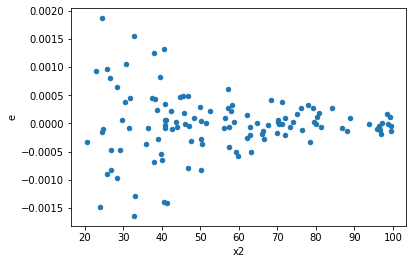

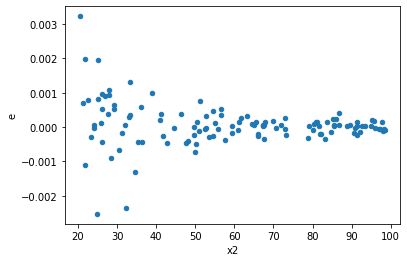

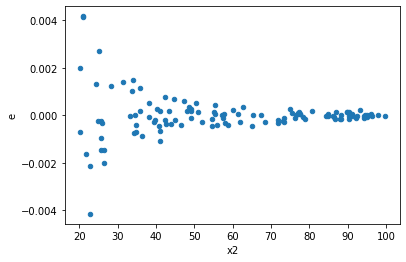

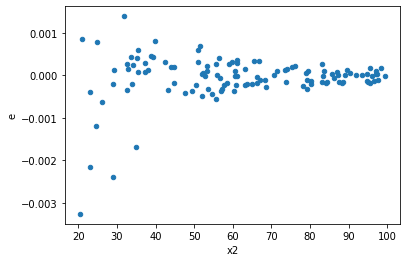

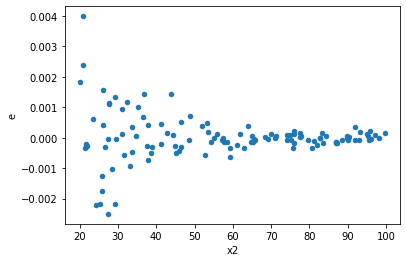

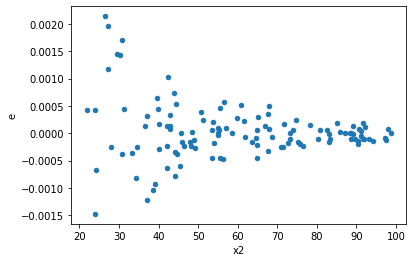

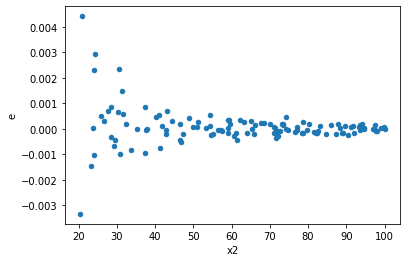

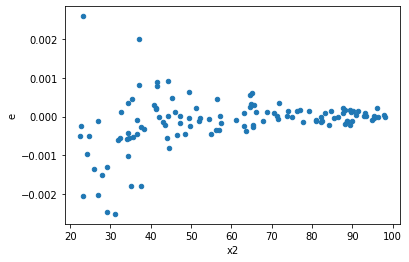

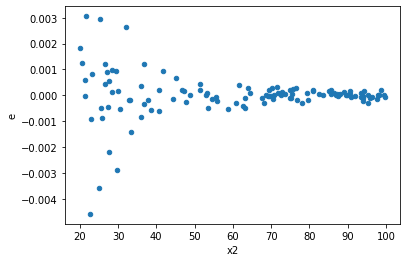

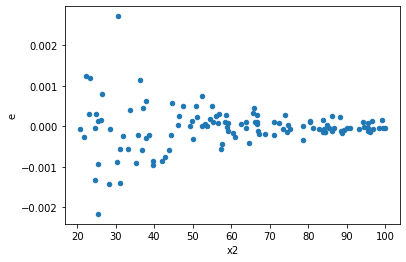

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,1.5449104136939531e-06,3.0076382041348503e-05,3.5111600311226204e-08,6.835541373033751e-07,0.051366231868249186,4.71148666292519e-18,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,1.2490712557243555e-06,3.890869285153532e-05,2.8387983084644443e-08,8.842884738985301e-07,0.03210262705278899,2.6640347197474365e-22,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,7.919620613706535e-07,8.64084692276983e-05,1.7999137758423942e-08,1.9638288460840523e-06,0.009165329144805515,3.95289060363633e-34,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,8.938872868698121e-07,3.0280617467859986e-05,2.0315620156132094e-08,6.881958515422724e-07,0.029520114238706954,4.496310237356605e-23,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,8.869669242595109e-07,6.973166077598562e-05,2.0158339187716156e-08,1.5848104721814913e-06,0.012719716042744347,5.414567037188995e-31,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,1.151085895994124e-06,2.6720529894081347e-05,2.6161043090775547e-08,6.072847703200307e-07,0.04307870766623875,1.2636614453099525e-19,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,9.680115872071026e-07,5.618379041273674e-05,2.2000263345615968e-08,1.2769043275621986e-06,0.01722937488011945,4.128524223168847e-28,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,7.988168472211242e-07,3.85191750317997e-05,1.815492834593464e-08,8.754357961772658e-07,0.02073816083967678,2.3050231148907788e-26,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,8.133258898975755e-07,8.845634540641142e-05,1.848467931585399e-08,2.0103714865093505e-06,0.009194658519530297,4.242196633813032e-34,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64